Author : Himanshu Gullaiya <br>
Sources : Pierian Data | Himanshu Gullaiya

# Object Detection
---------------------------

## 1. Template Matching

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib qt

In [2]:
dog = cv2.imread('../DATA/sammy.jpg')
dog_face = cv2.imread('../DATA/sammy_face.jpg')

In [3]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [4]:
plt.imshow(dog)

In [ ]:
height, width, channels = dog_face.shape
for m in methods:
    dog_copy = dog.copy()
    
    method = eval(m)
    
    res = cv2.matchTemplate(dog_copy, dog_face, method)
    
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res) # min max value from heatmap
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = top_left[0]+width,top_left[1]+height
    cv2.rectangle(dog_copy, top_left, bottom_right, 255,10)
   
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Result of Template Matching')
    
    plt.subplot(122)
    plt.imshow(dog_copy)
    plt.title('Detected Point')
    plt.suptitle(m)
    plt.show()

-------

## 2. Corner Detection
> Harris <br>
> Shi-Tomasi

In [ ]:
flat_chess = cv2.imread('../DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)
plt.imshow(flat_chess)

In [ ]:
gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_flat_chess,cmap='gray')

In [ ]:
real_chess = cv2.imread('../DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)
plt.imshow(real_chess)

In [ ]:
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_real_chess,cmap='gray')

#### a) Harris Corner Detection Algorithm
----------
**cv2.cornerHarris** Function

*  src Input single-channel 8-bit or floating-point image.
*  dst Image to store the Harris detector responses. It has the type CV_32FC1 and the same size as src .
*  blockSize Neighborhood size (see the details on #cornerEigenValsAndVecs ).
*  ksize Aperture parameter for the Sobel operator.
*  k Harris detector free parameter. See the formula in DocString
*  borderType Pixel extrapolation method. See #BorderTypes.


In [70]:
gray = np.float32(gray_flat_chess) # haris algo requires float values

In [71]:
dst = cv2.cornerHarris(src = gray, blockSize = 2, ksize = 3, k = 0.04)  #ksize = kernel size of sobel operator, k = hariss operator

In [72]:
dst = cv2.dilate(dst,None)

In [ ]:
plt.imshow(dst)

In [76]:
flat_chess[dst > 0.01*dst.max()] = [255,0,0]

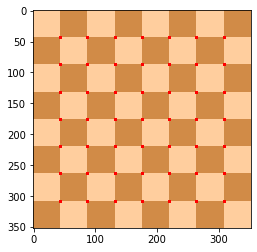

In [77]:
plt.imshow(flat_chess)

In [82]:
gray = np.float32(gray_real_chess)
dst = cv2.cornerHarris(src = gray, blockSize = 2, ksize = 3, k = 0.04)
dst = cv2.dilate(dst, None)

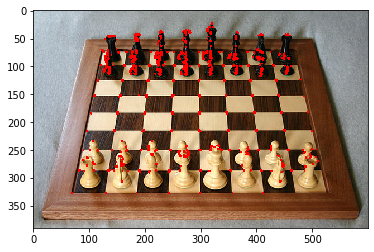

In [83]:
real_chess[dst > 0.01*dst.max()] = [255,0,0]
plt.imshow(real_chess)

#### b) Shi-Tomasi Corner Detector & Good Features to Track Paper
---------

[Link to Paper from Video](http://www.ai.mit.edu/courses/6.891/handouts/shi94good.pdf)

goodFeatureToTrack Function Parameters

* image Input 8-bit or floating-point 32-bit, single-channel image.
* corners Output vector of detected corners.
* maxCorners Maximum number of corners to return. If there are more corners than are found,the strongest of them is returned. `maxCorners <= 0` implies that no limit on the maximum is set and all detected corners are returned.
* qualityLevel Parameter characterizing the minimal accepted quality of image corners. The parameter value is multiplied by the best corner quality measure, which is the minimal eigenvalue (see #cornerMinEigenVal ) or the Harris function response (see #cornerHarris ). The corners with the quality measure less than the product are rejected. For example, if the best corner has the quality measure = 1500, and the qualityLevel=0.01 , then all the corners with the quality measure less than 15 are rejected.


In [102]:
flat_chess = cv2.imread('../DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)

gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)

In [104]:
corners = cv2.goodFeaturesToTrack(gray_flat_chess, 60, 0.01, 10)         

In [105]:
corners = np.int0(corners)

In [106]:
for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess,(x,y),3,(255,0,0), -1)

In [ ]:
plt.imshow(flat_chess)

In [108]:
real_chess = cv2.imread('../DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_RGB2GRAY)

In [121]:
corners = cv2.goodFeaturesToTrack(gray_real_chess, 100, 0.01, 10)

In [122]:
corners = np.int0(corners)

In [ ]:
for i in corners:
    x,y = i.ravel()
    cv2.circle(real_chess, (x,y), 3, (255,0,0), -1)
plt.imshow(real_chess)

----

## 3. Edge Detection

#### Canny Edge Detector
https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123

The Canny edge detection algorithm is composed of 5 steps:
> 1. Noise reduction : Gaussian Blur Filter
> 2. Gradient calculation;
> 3. Non-maximum suppression;
> 4. Double threshold;
> 5. Edge Tracking by Hysteresis.

In [151]:
img = cv2.imread('../DATA/sammy_face.jpg')

In [152]:
# blurred = cv2.GaussianBlur(img, (3,3), 10)
blurred = cv2.blur(img, ksize = (5,5))

In [153]:
med_val = np.median(img)

lower = int(max(0,0.7*med_val))
upper = int(min(255,1.3*med_val))

In [ ]:
edges = cv2.Canny(image=img, threshold1 = lower, threshold2 = upper)

In [162]:
edges = cv2.Canny(image=blurred, threshold1 = lower, threshold2 = upper+50)

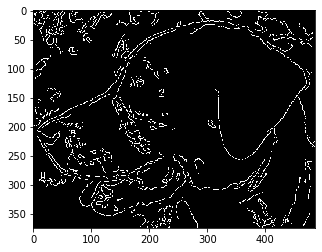

In [163]:
plt.imshow(edges, cmap = 'gray')

---------------------------------

## 4. Grid Detection

In [164]:
flat_chess = cv2.imread('../DATA/flat_chessboard.png')

In [165]:
found,corners = cv2.findChessboardCorners(flat_chess, (7,7)) # (7,7) is no of blocks

In [ ]:
cv2.drawChessboardCorners(flat_chess, (7,7), corners, found)

In [ ]:
plt.imshow(flat_chess)

### Circle Based Grids

In [177]:
dots = cv2.imread('../DATA/dot_grid.png')

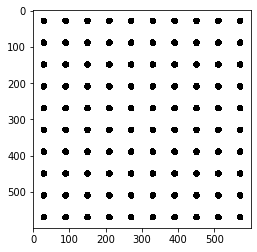

In [169]:
plt.imshow(dots)

In [178]:
found, corners = cv2.findCirclesGrid(dots, (10,10), cv2.CALIB_CB_SYMMETRIC_GRID)

In [179]:
found

True

In [ ]:
cv2.drawChessboardCorners(dots, (10,10), corners, found)

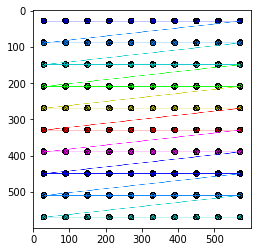

In [181]:
plt.imshow(dots)

Mainly used for camera calibration. Two functions: <br>
cv2.findChessboardCorners() <br>
cv2.findCirclesGrid()

-------------------

## 4. Contour Detection

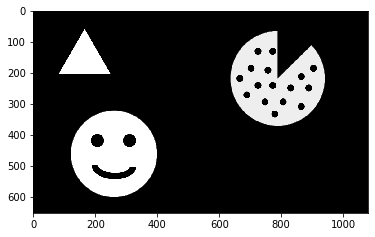

In [195]:
img = cv2.imread('../DATA/internal_external.png',0)
plt.imshow(img, cmap = "gray")

In [196]:
contours, hierarchy = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [7]:
type(contours)
len(contours)
type(hierarchy)

NameError: name 'contours' is not defined

In [201]:
hierarchy = hierarchy.reshape(-1,4)

In [ ]:
hierarchy

In [203]:
# Draw External Contours

# Set up empty array
external_contours = np.zeros(img.shape)

# For every entry in contours
for i in range(len(contours)):
    
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[i][3] == -1:
        
        # We can now draw the external contours from the list of contours
        cv2.drawContours(external_contours, contours, i, 255, -1)

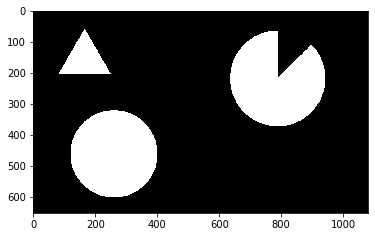

In [204]:
plt.imshow(external_contours,cmap='gray')

In [205]:
# Create empty array to hold internal contours
image_internal = np.zeros(img.shape)

# Iterate through list of contour arrays
for i in range(len(contours)):
    # If third column value is NOT equal to -1 than its internal
    if hierarchy[i][3] != -1:
        
        # Draw the Contour
        cv2.drawContours(image_internal, contours, i, 255, -1)
        

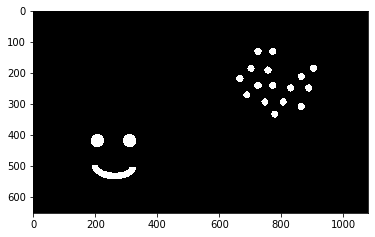

In [206]:
plt.imshow(image_internal,cmap='gray')

#### Gradient

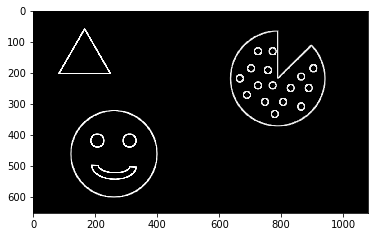

In [207]:
kernel = np.ones((5,5), dtype = np.uint8)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
plt.imshow(gradient, cmap = 'gray')

## 4. Feature Matching
1. Brute-Force Matching with ORB desciptors
2. Brute-Force Matching with SIFT descriptors & Ratio TEst
3. FLANN based Matcher

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib qt

In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')
    plt.tight_layout()
    

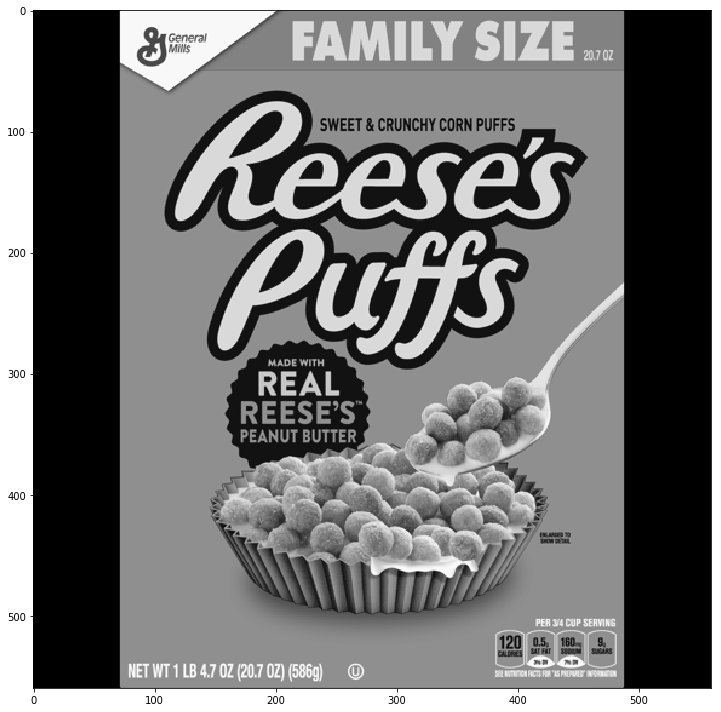

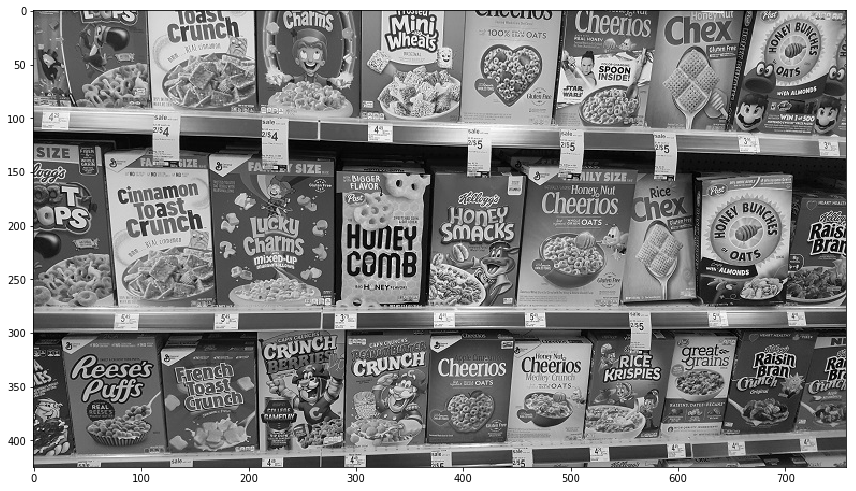

In [3]:
img =cv2.imread('../DATA/reeses_puffs.png',0)  
target_img = cv2.imread('../DATA/many_cereals.jpg',0) 
display(img)
display(target_img)

#### BRUTE - FORCE MATCHING with ORB Descriptors

In [17]:
orb = cv2.ORB_create()   # detection object
kp1,des1 = orb.detectAndCompute(img, None)
kp2,des2 = orb.detectAndCompute(target_img, None)

In [18]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True) # brute force matching

In [19]:
matches = bf.match(des1, des2)

In [23]:
matches = sorted(matches , key = lambda x:x.distance)   # Lesser the distance, better the match

In [28]:
img_matches = cv2.drawMatches(img, kp1, target_img, kp2, matches[:25], None, flags = 2)  # matches[:25] - first 25 matches

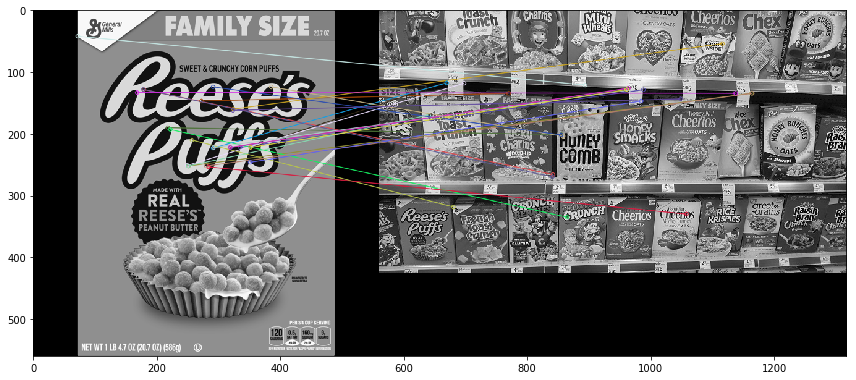

In [29]:
display(img_matches)

### BFM with SIFT (Scale Invarient Feature Transform) Descriptors

In [34]:
# Create SIFT Object
sift = cv2.xfeatures2d.SIFT_create()

In [35]:
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img,None)
kp2, des2 = sift.detectAndCompute(target_img,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)   # First Best Match, Second Best Match

In [39]:
# Apply ratio test
good = []
for match1,match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

# cv2.drawMatchesKnn expects list of lists as matches.
sift_matches = cv2.drawMatchesKnn(img,kp1,target_img,kp2,good,None,flags=2)

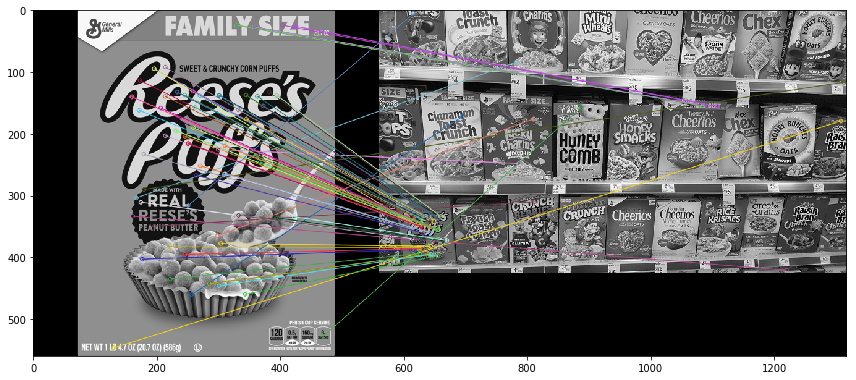

In [37]:
display(sift_matches)

### FLANN based Matcher

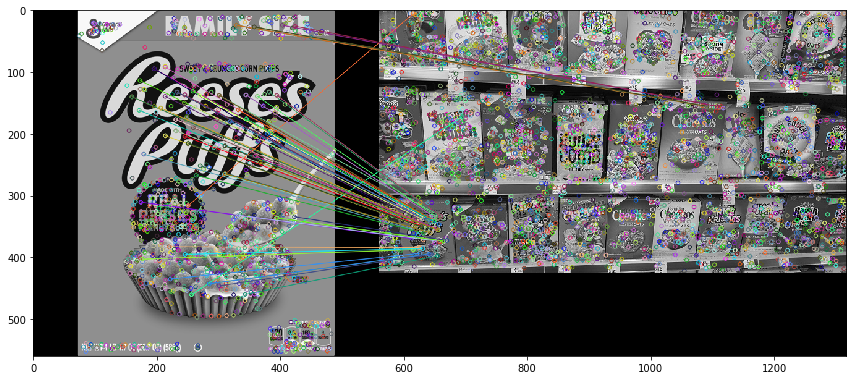

In [65]:
sift = cv2.xfeatures2d.SIFT_create()

kp1, des1 = sift.detectAndCompute(img,None)
kp2, des2 = sift.detectAndCompute(target_img,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)  

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

good = []

# ratio test
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        
        good.append([match1])


flann_matches = cv2.drawMatchesKnn(img,kp1,target_img,kp2,good,None,flags=0)

display(flann_matches)

In [79]:
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img,None)
kp2, des2 = sift.detectAndCompute(target_img,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)  

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,255),
                   singlePointColor = (0,255,0),
                   matchesMask = matchesMask,
                   flags = 2)

flann_matches = cv2.drawMatchesKnn(img,kp1,target_img,kp2,matches,None,**draw_params)

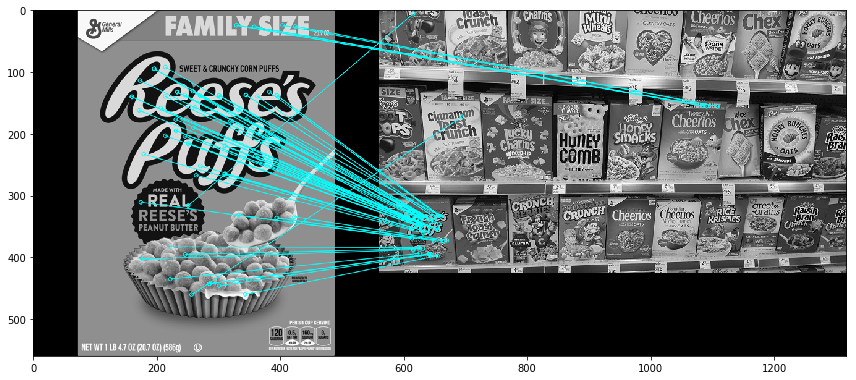

In [80]:
display(flann_matches)

## 5. Image Segmentation

### Watershed Algorithm

> * In geography, A Watershed is a land area that channels rainfall & snowmelt to creeks, streams & rivers, and eventually to outflow points suhc as ocean.
> * These watersheds can be segmented as topographical maps with boundaries.
> * The watershed algo., tranformation treats the image as a topographic map, where brightness of each point represents height & and finds the line that run along the tops of ridges or seperated the segments with different brightness levels.
> * Any grayscale image can be viewed as a topographic surface where high intensity denotes Peaks and hills while low intensity denotes Valleys.
> * The algorithm, can then fill every isolated valleys (local minima) with different colored water (labels).
> * If in an image, objects start to merge at some point All other CV algos., think of them as a single object but watershed creates a barrier or (segments edge boundaries) to differentiate between them.
> * This algo is very useful in segmenting images into background & foreground in situations that are difficult for other algorithms.

> * A common example is the use of coins next to each other on a table. <br>.
<img src = "images/coins_1.PNG" height = "20%" width = "20%"><br>

> * Other Algos: <br>
<img src = "images/coins_2.PNG" height = "20%" width = "20%"><br>

> * Watershed Algo: <br>
<img src = "images/coins_3.PNG" height = "40%" width = "40%">

### Automatic Image Segmentation by placing manual seeds

<img src = "images/preseeding_segmentation_1.PNG" height = "40%" width = "40%" side = "left">  <img src = "images/preseeding_segmentation_2.PNG" height = "40%" width = "40%" side = "right">


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def display(img,cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

## Our Task: Draw Contours Around the Coins

## 1) NAIVE Approach
> * Median Blur
> * Grayscale
> * Binary Threshold
> * Finding Contours

In [76]:
sep_coins_gray = cv2.imread('../DATA/pennies.jpg',0)
sep_coins_clr = cv2.imread('../DATA/pennies.jpg')

In [ ]:
display(sep_coins_gray,'gray')

In [ ]:
blurred = cv2.medianBlur(sep_coins_gray, 25)
display(blurred, 'gray')

In [ ]:
rec,t1 = cv2.threshold(blurred, 160, 255, cv2.THRESH_BINARY_INV)
display(t1, 'gray')

In [81]:
contours, hierarchy = cv2.findContours(t1.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

hierarchy = hierarchy.reshape(-1,4)
external_contours = np.zeros(t1.shape)
for i in range(len(contours)):
    
    if hierarchy[i][3] == -1:
        cv2.drawContours(sep_coins_clr, contours, i, (255,0,0), 10)

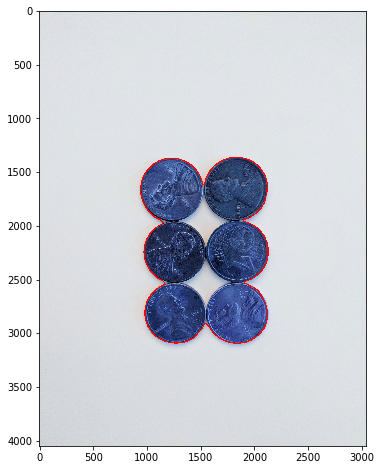

In [83]:
display(sep_coins_clr)

Drawbacks of Naive Approach: Contours are considered as a single image and it is not segmented in between.

## 2) Improving Segmentation, Using Watershed Algorithm

In [84]:
img = cv2.imread('../DATA/pennies.jpg')
img = cv2.medianBlur(img,35)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [88]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU) # otsu works really well in conjunction with watershed

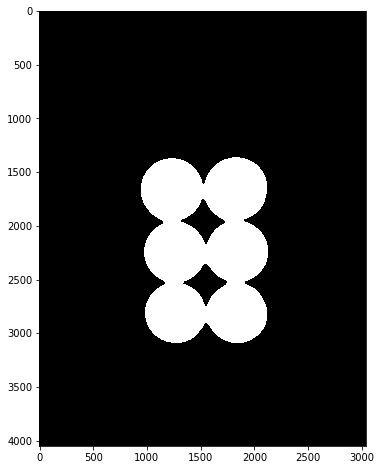

In [89]:
display(thresh,cmap='gray')

In [174]:
# Optional Step( Noise Removal)
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

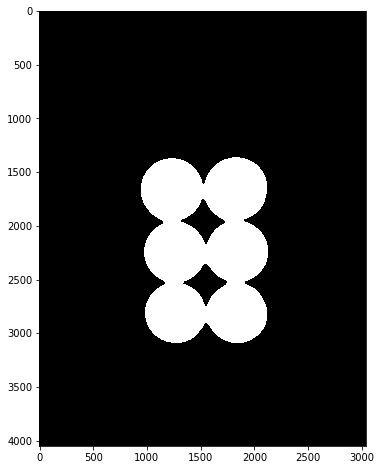

In [93]:
display(opening,cmap='gray')

In [90]:
# Putting particular seeds to segment

## 1) Marking Markers For 6 Pennies - Manually using Code

### Distance Tranform
https://homepages.inf.ed.ac.uk/rbf/HIPR2/distance.htm

The basic idea is that as the distance of a pixel increases from the 0 intensity pixels in a binary image(or from outer level towards inner level), the intensity of pixels increases. This will help us to find the sure points of the six pennies.

In [94]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

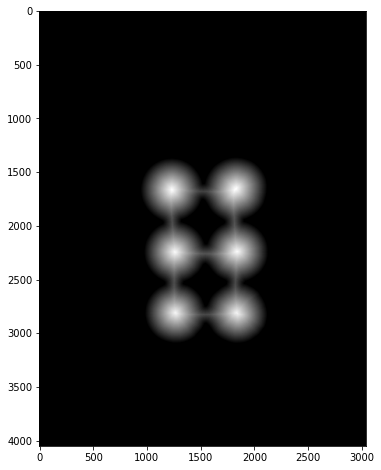

In [96]:
display(dist_transform, 'gray')

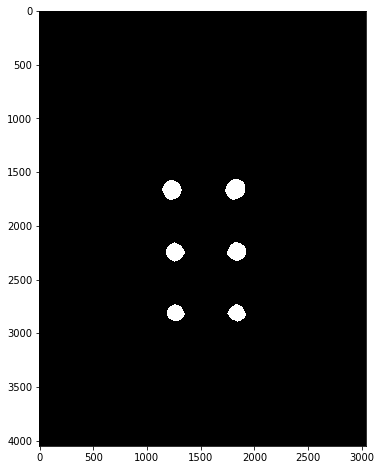

In [121]:
ret,sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)
display(sure_fg, 'gray')

In [110]:
# Printing Unknown Region

In [127]:
sure_fg.dtype

dtype('uint8')

In [128]:
opening.dtype

dtype('uint8')

In [129]:
# changing dtype of sure_fg

# sure_fg = np.array(sure_fg, dtype = np.uint8)
# or

sure_fg = np.uint8(sure_fg)
sure_bg = np.uint8(opening)

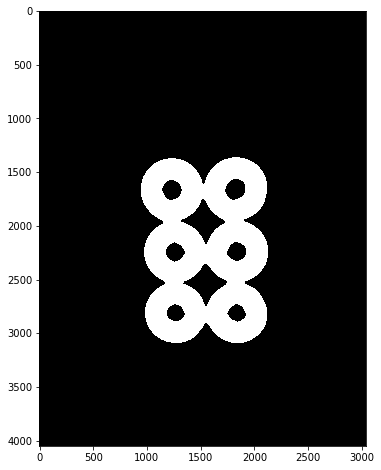

In [131]:
unknown = cv2.subtract(sure_bg, sure_fg)
display(unknown, 'gray')

In [132]:
# Create Labelmarkers for these 6 Pennies

In [168]:
ret, markers = cv2.connectedComponents(sure_fg)

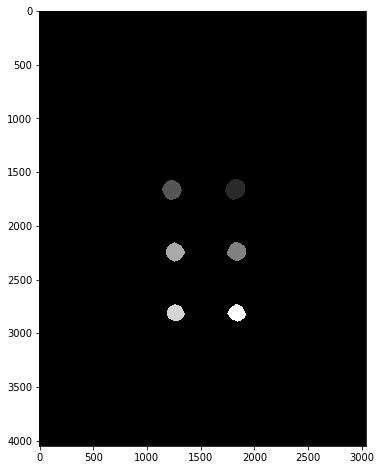

In [169]:
display(markers, 'gray')

In [171]:
markers = markers + 1

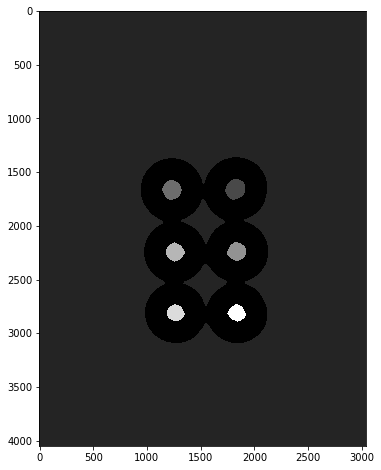

In [172]:
markers[unknown == 255] = 0 
display(markers, 'gray')

Now CV algorithm can easily Understand, dark gray is the background, black is still unknown but may be counted as foreground (which it seems to the uan eye) and 6 markers.

In [175]:
markers = cv2.watershed(img, markers)

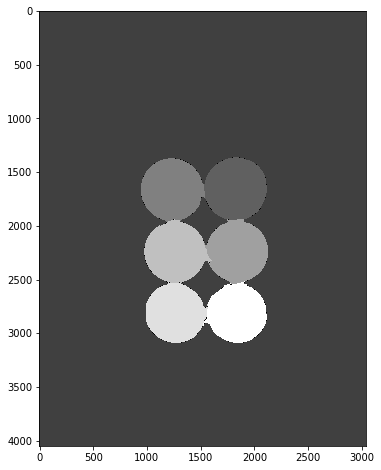

In [176]:
display(markers, 'gray')

In [178]:
# Finding contours

contours, hierarchy = cv2.findContours(markers, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

hierarchy = hierarchy.reshape(-1,4)
external_contours = np.zeros(t1.shape)
for i in range(len(contours)):
    
    if hierarchy[i][3] == -1:
        cv2.drawContours(sep_coins_clr, contours, i, (255,0,0), 10)

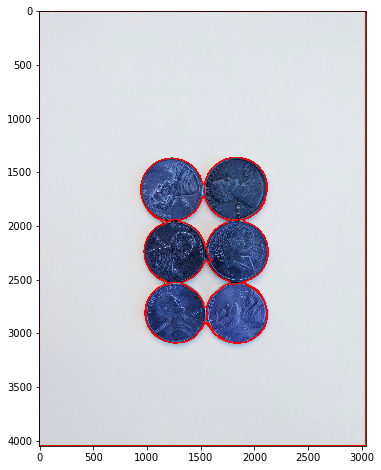

In [179]:
display(sep_coins_clr)

## 2)  Marking Markers using Custom Seeds with Watershed Algorithm
by Clicking the segments on image

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

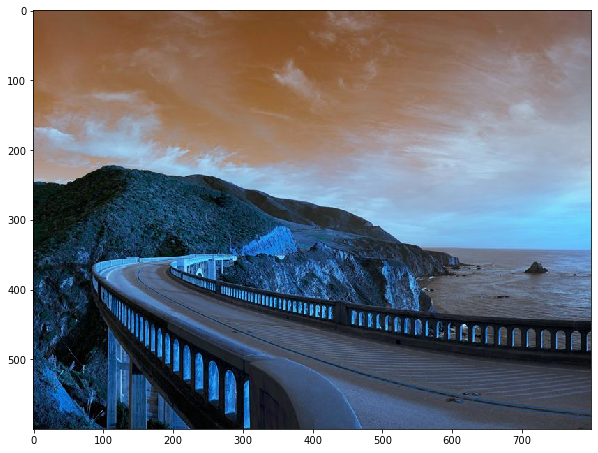

In [3]:
road = cv2.imread('../DATA/road_image.jpg')
display(road, 'gray')

In [9]:
from matplotlib import cm
def create_rgb(i):
    x = np.array(cm.tab10(i))[:3]*255
    return tuple(x)

In [18]:
colors = []
for x in range(10):
    colors.append(create_rgb(x))

current_color = 1
marks_updated = False

In [19]:
markers = np.zeros(road.shape[:2], dtype = np.int32)
segments = np.zeros(road.shape,dtype=np.uint8)
road_copy = np.copy(road)

In [20]:
def mouse_callback(event, x, y, flags, param):
    global marks_updated
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(road_copy, (x,y), 10, colors[current_color], -1)
        cv2.circle(markers, (x,y), 10, current_color, -1)
#         cv2.imshow('Road Image', road_copy)
#         cv2.imshow('Segments', segments)
        marks_updated = True

In [26]:
cv2.namedWindow('Road Image')
cv2.setMouseCallback('Road Image', mouse_callback)

while True:
    cv2.imshow('Road Image', road_copy)
    cv2.imshow('Segments', segments)
    
    key_pressed = cv2.waitKey(1)
    
    if key_pressed in (ord('q'), 27):
        break
    
    elif key_pressed == ord('c'):
        road_copy = road.copy()
        markers = np.zeros(road.shape[:2], dtype = np.int32)
        segments = np.zeros(road.shape,dtype=np.uint8)
     
    elif key_pressed > 0 and chr(key_pressed).isdigit():
        current_color = int(chr(key_pressed))
    
    if marks_updated:
        markers_copy = markers.copy()
        cv2.watershed(road, markers_copy)
        
        segments = np.zeros(road.shape,dtype=np.uint8)
        
        for color_ind in range(10):
            segments[markers_copy == (color_ind)] = colors[color_ind]
        
        marks_updated = False
        
cv2.destroyAllWindows()